In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 逆関数法を用いた乱数の生成

一様乱数をもとに、与えられた１次元の確率分布に従う乱数Xを生成したい。
生成したい乱数が従う累積分布関数をFとする。累積分布関数は単調増加より、逆関数$F^{-1}$が存在する。
このとき、一様乱数$U$を用いて
$$
X = F^{-1}(U)
$$
により、乱数が生成できる。
なぜなら、
$$
P(X \leq x) = P(F^{-1}(U)  \leq x) = P(U \leq F(x)) = F(x)
$$
が成り立つからである。

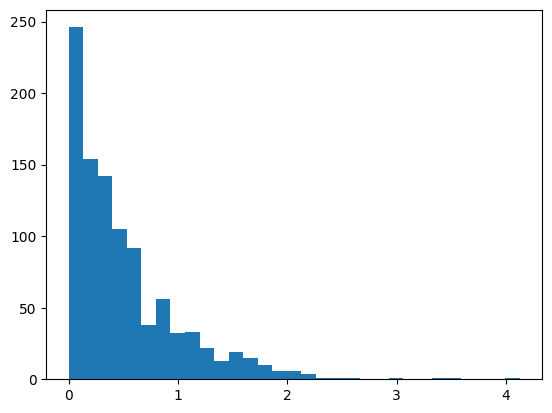

理論値: 平均:0.5,分散:0.25
サンプリング: 平均:0.5128195103375716, 分散:0.2655871563736618


In [7]:
# 指数分布の例

# F(x) = 1 - exp(-λx) 
# F^{-1}(U) = -log(1 - U)/λ によって生成できる

# 一様分布を1000個サンプリング
u = np.random.uniform(0, 1, 1000)
lambda_ = 2 # λ = 2の指数分布をサンプリングすることにする。
x = -np.log(1 - u)/ lambda_
plt.figure()
plt.hist(x, bins=int((np.sqrt(len(x)))))
plt.show()
print(f'理論値: 平均:{1/lambda_},分散:{1/lambda_**2}') 
print(f'サンプリング: 平均:{np.mean(x)}, 分散:{np.var(x)}')

In [14]:
# 生成計算時間の比較
import time
start = time.time()
x = np.random.exponential(lambda_) # numpyで生成
print(time.time() - start, 'numpyで生成')
start = time.time()
x = -np.log(np.random.uniform(0, 1, 1000))/ lambda_ # 逆関数法で生成
print(time.time() - start, '逆関数法で生成')

# numpyで生成した方が早いので、なにか違う実装をしているのかも・・・

5.2928924560546875e-05 numpyで生成
0.0001533031463623047 逆関数法で生成


## 離散分布の場合
上記の逆変換法では、累積分布関数Fの逆関数が存在することを仮定したが、明らかに離散分布の累積分布関数は逆関数をもたない。
しかし、逆関数法はこの場合でも使うことができる。

一般の確率分布$P$を考える。確率分布$P$の確率関数$p(x)$はより一般に、実数 $x_1 < x_2 < \cdots$をとれる。便宜的に$x_0 = -\infty$とする。
累積分布関数は
$$F(x_n)=p(x_1) + \cdots + p(x_n)\  (n=1, 2, \cdots)$$
および、$F(x_0)=0$となる。
次の、手続きを離散分布に関する逆関数法とよぶことにする。一様乱数$U$にたいして
$$
F(x_{n-1})< U \leq F(x_n) ならば X=x_n
$$
と定める。すると
$$P(X=x_n) = P(F(x_{n-1} < U < F(x_{n}))) = F(x_n) -F(x_{n-1}) = p(x_n)$$
となり、$X$が$P$に従うことが確かめられる。

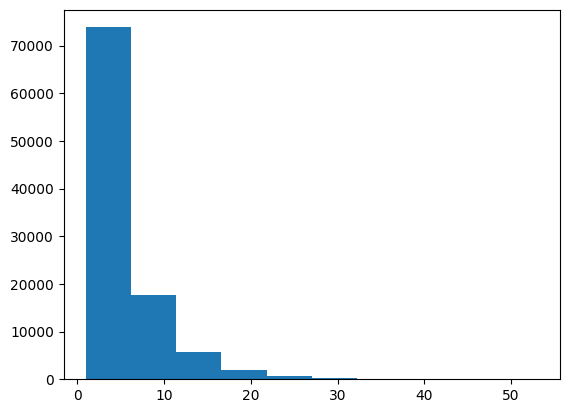

真 平均:5.0,分散:19.999999999999996
サンプリング 平均:4.98792, 分散:20.0182140736
組み込みサンプリング 平均:4.9461, 分散:19.078794789999993


In [45]:
# 幾何分布の場合
# F(x) = 1 - (1 - p)^x だから
# 1 - (1 - p)^x < U <= 1 - 1 (1-p)^{x+1} ならば　X = xとする。
# すなわち、Xは1 - (1-p)^{x} < U をみたす最大の整数である。
# ゆえに、 X = [lpg(1-U) / log(1-p)]

p = 0.2# 幾何分布のパラメータ
u = np.random.uniform(0, 1, 100000)
# x = np.floor(np.log(1.0-u)/np.log(1.0-p))
x = np.ceil(np.log(1 - u) / np.log(1 - p))

plt.figure()
plt.hist(x)
plt.show()
print(f'真 平均:{1/p},分散:{(1-p)/(p**2)}')
print(f'サンプリング 平均:{np.mean(x)}, 分散:{np.var(x)}')
v = np.random.geometric(p, 10000)
print(f'組み込みサンプリング 平均:{np.mean(v)}, 分散:{np.var(v)}')